# Enhancing Health Systems Through Data Science: An Analysis of Electronic Health Records (EHRs)

This Project Looks at the health care system and explores how data Science Techniques such as Predictive modeling , Clustering and Dimentionality reduction can be used to improve healthcare resource allocation and patient outcomes 

In [1]:
#data loading
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\golli\Downloads\archive\Patient_Data_Testing_Features.csv")

In [3]:
#Evaluate data quality

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4084 non-null   int64  
 1   Year                         4084 non-null   int64  
 2   Age                          4084 non-null   int64  
 3   Race                         4084 non-null   object 
 4   Sex                          4084 non-null   object 
 5   State                        4084 non-null   object 
 6   Zip Code                     4084 non-null   object 
 7   MSA                          4084 non-null   object 
 8   Enrollment Type Categorized  4084 non-null   int64  
 9   Enrollment Months            4084 non-null   float64
 10  HCC Score                    4071 non-null   float64
 11  Avg. LOS                     4084 non-null   float64
 12  Diagnosis                    4084 non-null   int64  
 13  # Total Claims    

In [5]:
data.head()

,ID,Year,Age,Race,Sex,State,Zip Code,MSA,Enrollment Type Categorized,Enrollment Months,...,# Imaging,# Part B Imaging,# Part B E&M,# Part B Drugs,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous
0,44782019,2019,71,White,Male,Michigan,48848,99022,10,12.0,...,2,6,6.0,0,1,0,0.0,78,0,0
1,44842017,2017,75,White,Male,Michigan,49765,99022,10,12.0,...,1,1,1.0,3,0,0,0.0,112,14,0
2,44842018,2018,76,White,Male,Michigan,49765,99022,10,12.0,...,1,2,2.0,3,1,0,0.0,43,9,0
3,44862019,2019,73,White,Male,Michigan,48617,99022,10,12.0,...,3,3,3.0,0,1,0,0.0,55,11,0
4,44862018,2018,72,White,Male,Michigan,48617,99022,10,12.0,...,1,1,1.0,1,0,0,0.0,70,4,0


In [6]:
data.describe(include='all')

,ID,Year,Age,Race,Sex,State,Zip Code,MSA,Enrollment Type Categorized,Enrollment Months,...,# Imaging,# Part B Imaging,# Part B E&M,# Part B Drugs,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous
count,4.084000e+03,4084.000000,4084.000000,4084,4084,4084,4084,4084,4084.000000,4084.000000,...,4084.000000,4084.000000,4083.000000,4084.000000,4084.000000,4084.000000,3904.000000,4084.000000,4084.000000,4084.000000
unique,NaN,NaN,NaN,7,2,10,411,26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,White,Female,Michigan,48911,99022,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3456,2276,3950,203,1368,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.621751e+07,2018.607493,68.900343,NaN,NaN,NaN,NaN,NaN,13.027179,11.952498,...,4.970617,9.786974,9.789371,1.143487,1.493879,0.596719,0.735912,91.712292,7.156219,0.087904
std,2.748055e+07,1.293535,12.339813,NaN,NaN,NaN,NaN,NaN,4.719877,0.502943,...,3.926725,8.047597,8.047124,3.415396,3.185922,2.708320,3.376636,83.980321,9.601416,0.481711
min,9.201700e+04,2017.000000,21.000000,NaN,NaN,NaN,NaN,NaN,10.000000,2.000400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.224952e+07,2017.000000,62.000000,NaN,NaN,NaN,NaN,NaN,10.000000,12.000000,...,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,0.000000
50%,4.621202e+07,2019.000000,71.000000,NaN,NaN,NaN,NaN,NaN,10.000000,12.000000,...,4.000000,8.000000,8.000000,0.000000,1.000000,0.000000,0.000000,68.000000,4.000000,0.000000
75%,6.936202e+07,2019.000000,77.000000,NaN,NaN,NaN,NaN,NaN,20.000000,12.000000,...,6.000000,13.000000,13.000000,1.000000,2.000000,0.000000,0.000000,110.000000,10.000000,0.000000


# Variable Description


The dataset has 42 columns and 4,084 entries, capturing various demographic, medical, and healthcare usage information.



Demographic data – Age, Race, sex
The Hierarchical Condition Category (HCC) score- patient’s overall health risk Average Length of Stay (LOS)- hospital stay duration
Healthcare resource utilization – visits to the ER, hospital outpatient visits, skilled nursing facility (SNF) use, and home health services, Enrolment Months, Total Claims and Labs


# Data Cleaning

I will Prepare the data for analyse by cleaning the data 

I focused on completeness of the by identifying missing values, I then Imputed the missing values using Imputation with the median for numerical columns in the attempt to reduce the influence of outliers. I made use of the SimpleImputer with the median from scikit-learn.

In [7]:
#Handle missing values
missing_values = data.isnull().mean() * 100

In [8]:
#numerical columns for statistical cleaning and outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [9]:
#Missing values percentage and basic statistics
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)
numerical_summary = data[numerical_columns].describe()


In [10]:
missing_values_summary, numerical_summary

(# Part-B Dialysis    4.407444
 # Readmissions       1.616063
 # Inpatient          0.954946
 HCC Score            0.318315
 # Part B Labs        0.024486
 # Part B E&M         0.024486
 dtype: float64,
                  ID         Year          Age  Enrollment Type Categorized  \
 count  4.084000e+03  4084.000000  4084.000000                  4084.000000   
 mean   4.621751e+07  2018.607493    68.900343                    13.027179   
 std    2.748055e+07     1.293535    12.339813                     4.719877   
 min    9.201700e+04  2017.000000    21.000000                    10.000000   
 25%    2.224952e+07  2017.000000    62.000000                    10.000000   
 50%    4.621202e+07  2019.000000    71.000000                    10.000000   
 75%    6.936202e+07  2019.000000    77.000000                    20.000000   
 max    9.727202e+07  2021.000000    99.000000                    31.000000   
 
        Enrollment Months    HCC Score     Avg. LOS    Diagnosis  \
 count        40

In [11]:
#Handle missing values by imputation using mean, median, or predictive models.
from sklearn.impute import SimpleImputer

In [12]:
#impute missing numerical values with the median to avoid outlier influence
num_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

In [13]:
missing_after_imputation = data.isnull().sum().sum()
missing_after_imputation

0

In [14]:
#Exploratory Data Analysis (EDA) and Visualizations

# Data Visualization 

with Matplotlib, Matplotlib aids in presenting data trends and patterns effectively in healthcare.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

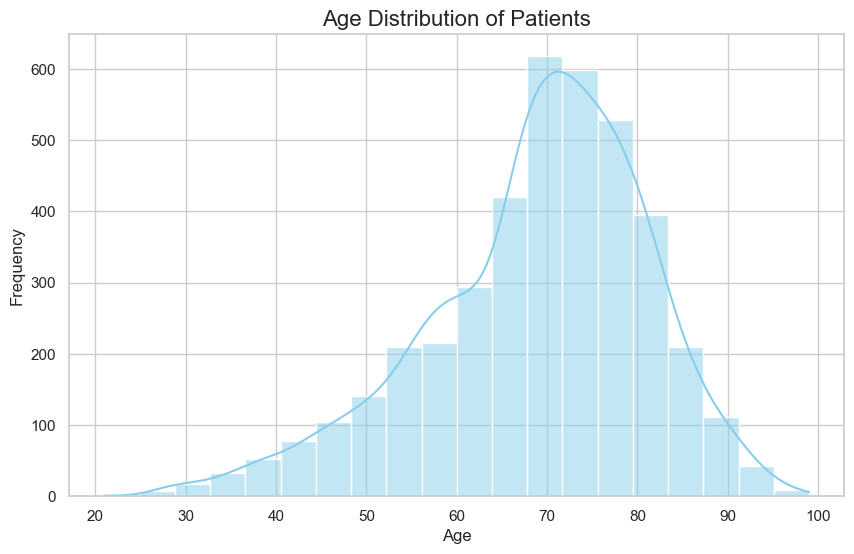

In [16]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

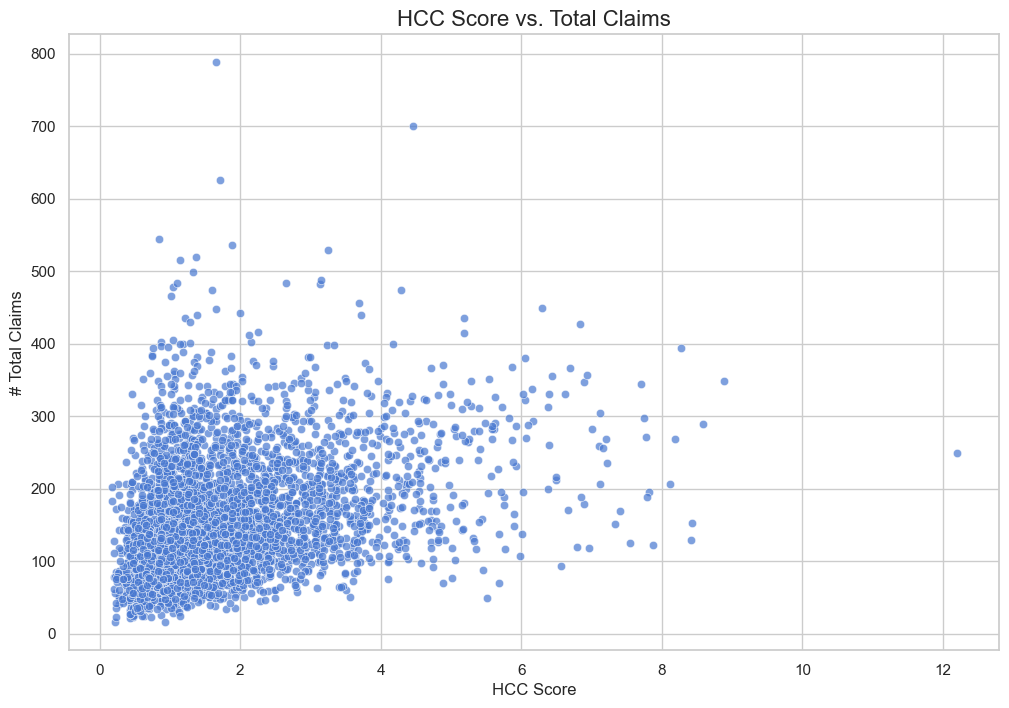

In [17]:
#Healthcare Utilization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='HCC Score', y='# Total Claims', data=data, alpha=0.7)
plt.title('HCC Score vs. Total Claims', fontsize=16)
plt.xlabel('HCC Score', fontsize=12)
plt.ylabel('# Total Claims', fontsize=12)
plt.show()

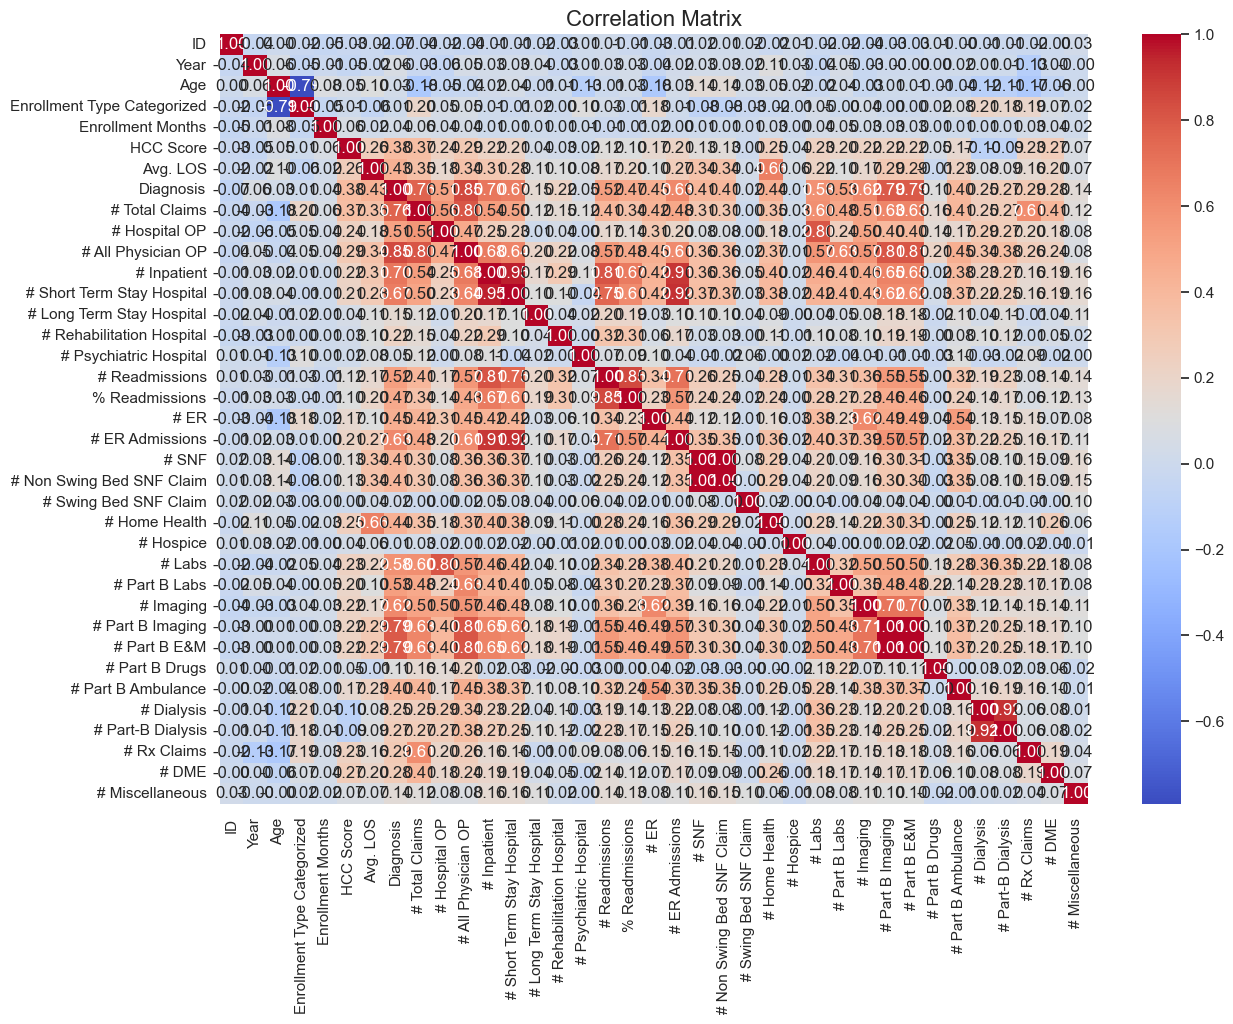

In [20]:
#Correlation heatmap
plt.figure(figsize=(14, 10))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


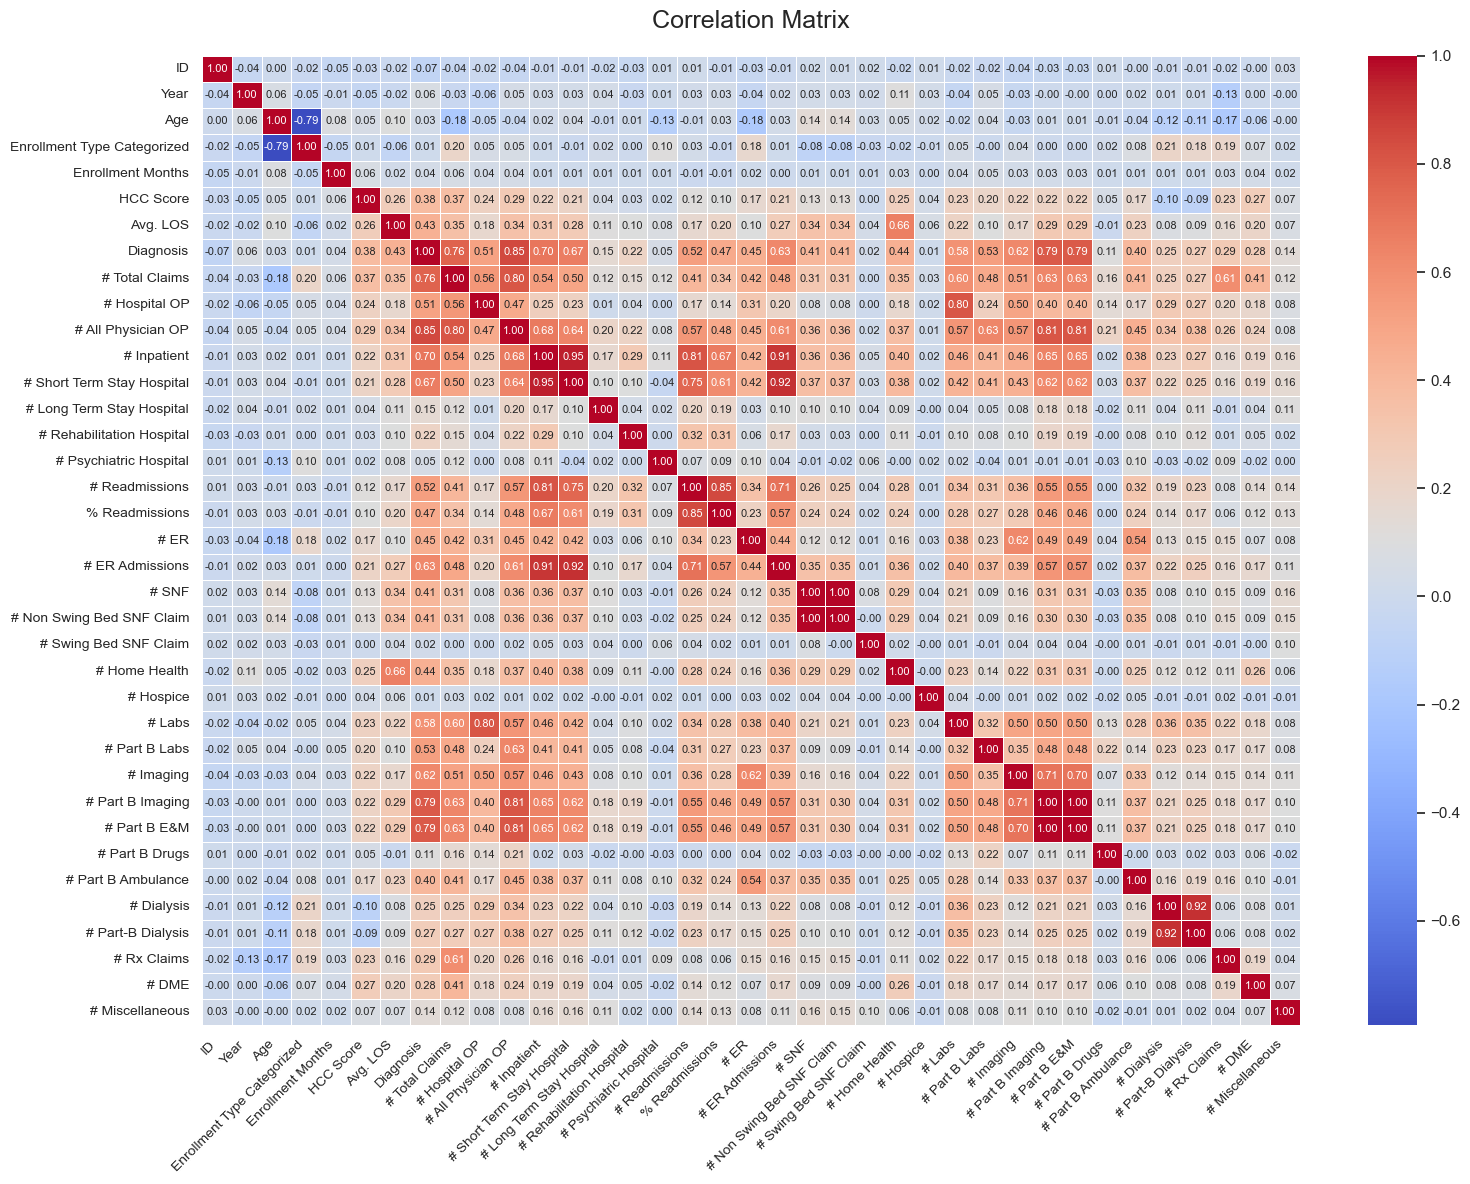

In [21]:
# Readablility  
plt.figure(figsize=(16, 12))  
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',cbar=True,annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=18, pad=20)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotating x-axis labels 
plt.yticks(fontsize=10)  
plt.tight_layout() 
plt.show()

In [22]:
#Statistical Analysis (Including PCA)
#applying PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
#numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [24]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [25]:
#Apply PCA
pca = PCA(n_components=5)  
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(5)])


In [26]:
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

Explained Variance Ratio: [0.27418795 0.06942909 0.05611468 0.04973303 0.04712592]


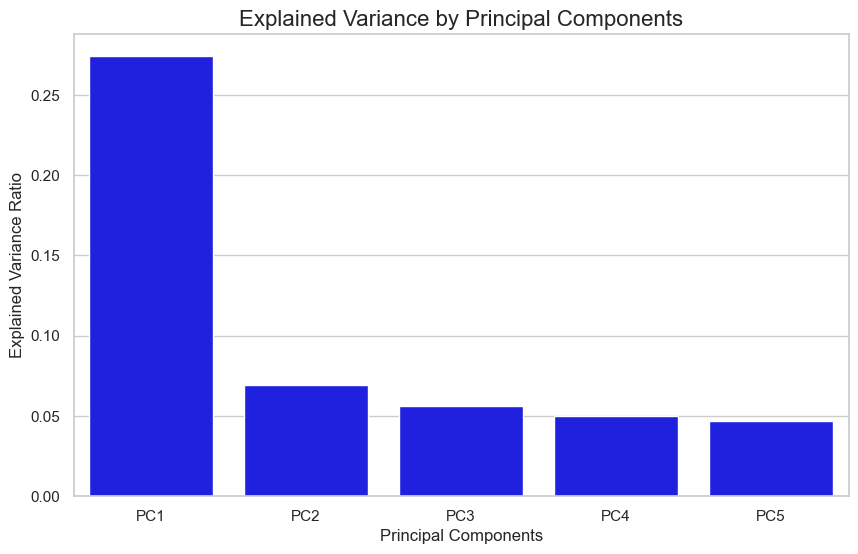

In [27]:
#Visualizing PCA
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(5)], y=pca.explained_variance_ratio_, color='blue')
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.show()

In [28]:
#readmission
readmission_by_state =data.groupby('State')['# Readmissions'].mean()
print(readmission_by_state)

State
Florida          0.909091
Georgia          0.000000
Massachusetts    4.000000
Michigan         0.327848
Nevada           0.000000
Ohio             0.312500
Pennsylvania     1.000000
Texas            0.000000
Unknown          0.246154
Washington       0.000000
Name: # Readmissions, dtype: float64


In [29]:
#Top diagnoses linked to high claims
top_diagnoses = data.groupby('Diagnosis')['# Total Claims'].mean().sort_values(ascending=False).head(10)
print(top_diagnoses)

Diagnosis
253.0    536.0
265.0    515.0
219.0    511.0
233.0    499.0
264.0    488.0
276.0    484.0
244.0    466.0
221.0    426.0
214.0    422.5
258.0    421.0
Name: # Total Claims, dtype: float64


In [30]:
#Apply a clustering algorithm (K-means) to the dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
#Optimal Number of Clusters (Elbow Method)

In [32]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

C:\Users\golli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\golli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\golli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\golli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

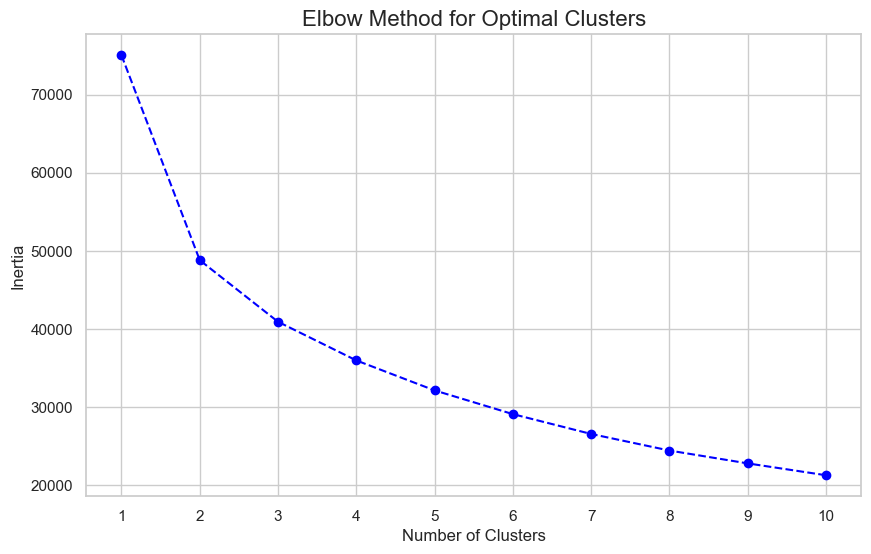

In [33]:
#Elbow Curve plot
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(K)
plt.show()

In [34]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

C:\Users\golli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
pca_df['Cluster'] = clusters
print("Cluster Labels Assigned:")
print(pca_df.head())

Cluster Labels Assigned:
        PC1       PC2       PC3       PC4       PC5  Cluster
0 -1.341557 -1.743873 -0.421565 -1.195687 -0.642999        1
1 -2.525164  0.500218 -0.824321  0.524831 -0.741094        1
2 -3.232226 -0.387636 -0.020137  0.287511 -0.567994        1
3 -3.129664 -0.447316  0.257004  0.146779 -0.388925        1
4 -3.831474 -0.676285  0.402840 -0.131350 -0.102276        1


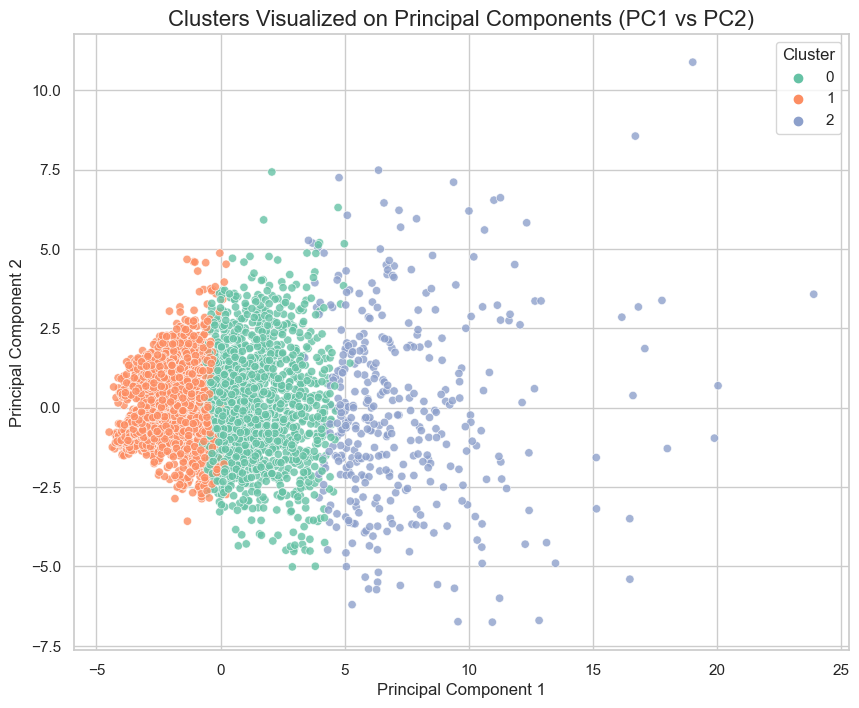

In [36]:
#Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='Set2', alpha=0.8)
plt.title('Clusters Visualized on Principal Components (PC1 vs PC2)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [37]:
#silhouette Score
sil_score = silhouette_score(pca_df.iloc[:, :-1], pca_df['Cluster'])
print(f"Silhouette Score for 3 clusters: {sil_score}")

Silhouette Score for 3 clusters: 0.2983491695795904
